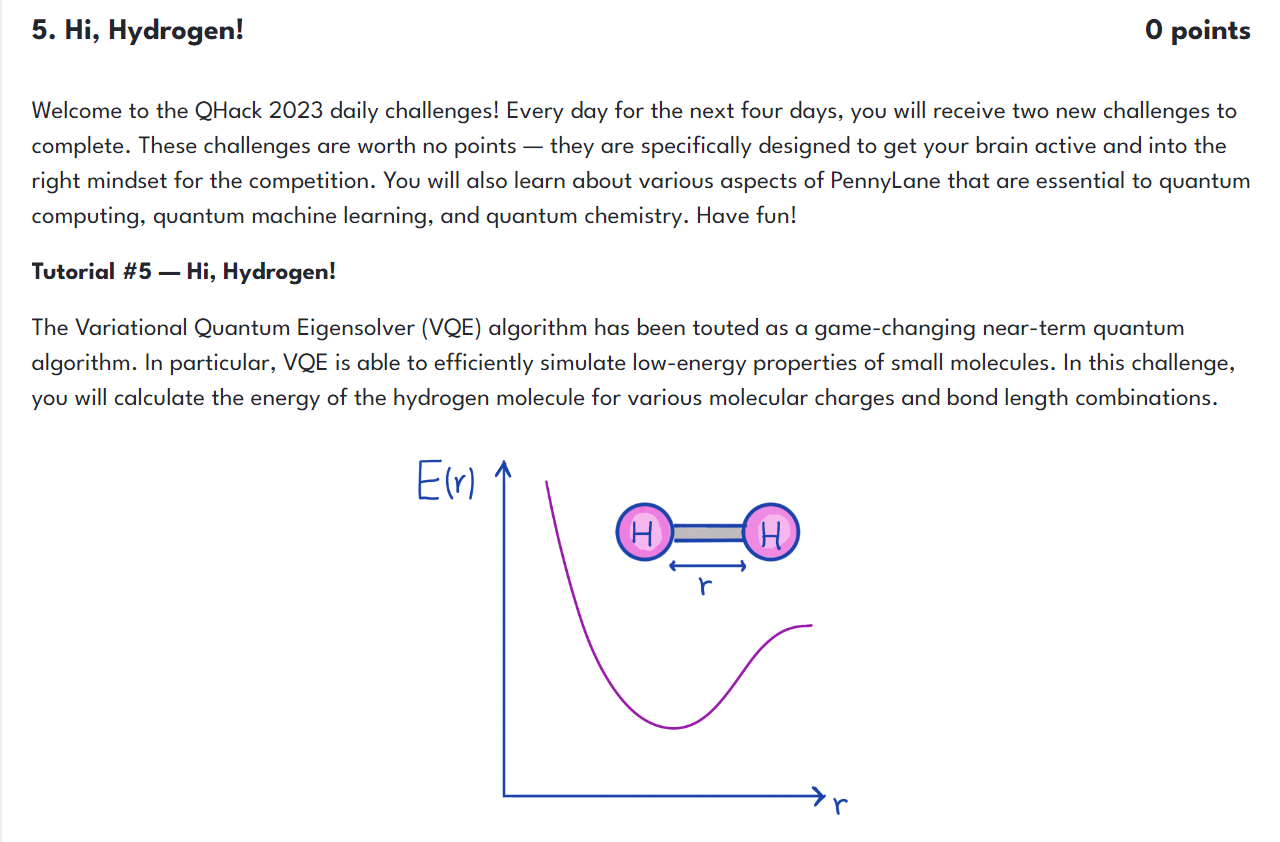

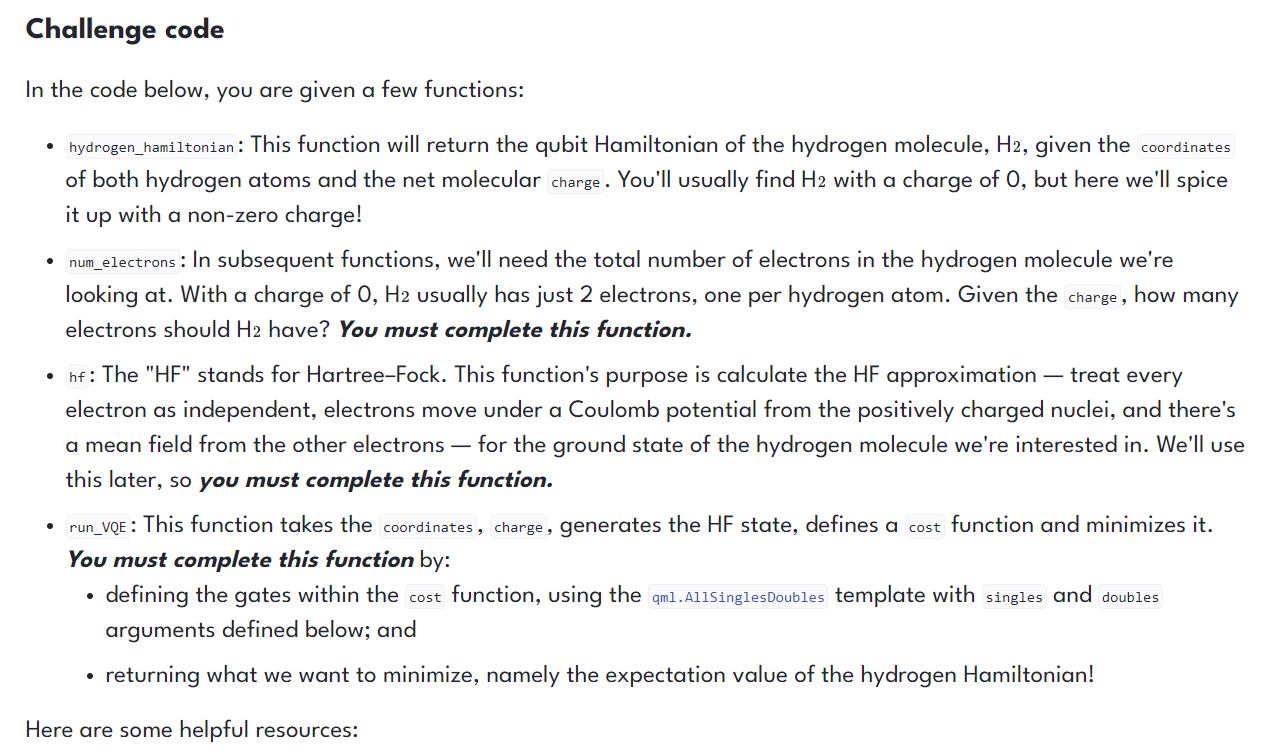

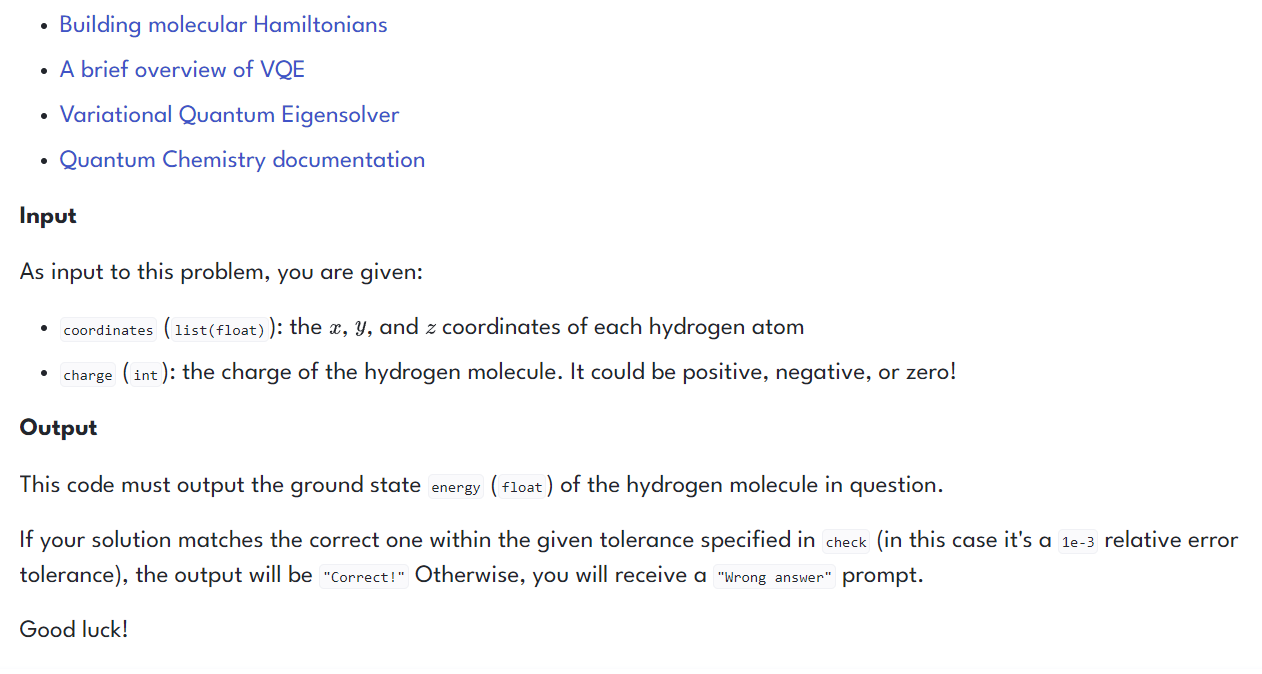

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def hydrogen_hamiltonian(coordinates, charge):
    """Calculates the qubit Hamiltonian of the hydrogen molecule.
    
    Args:
        coordinates (list(float)): Cartesian coordinates of each hydrogen molecule.
        charge (int): The electric charge given to the hydrogen molecule.

    Returns:
        (qml.Hamiltonian): A PennyLane Hamiltonian.
    """
    return qml.qchem.molecular_hamiltonian(
        ["H", "H"], coordinates, charge, basis="STO-3G"
    )[0]

def num_electrons(charge):
    """The total number of electrons in the hydrogen molecule.
    
    Args:
        charge (int): The electric charge given to the hydrogen molecule.

    Returns: 
        (int): The number of electrons.
    """


    # Put your solution here #
    return


def hf(electrons, num_qubits):
    """Calculates the Hartree-Fock state of the hydrogen molecule.
    
    Args:
        electrons (int): The number of electrons in the hydrogen molecule.
        num_qubits (int): The number of qubits needed to represent the hydrogen molecule Hamiltonian.

    Returns:
        (numpy.tensor): The HF state.
    """


    # Put your solution here #
    return


def run_VQE(coordinates, charge):
    """Performs a VQE routine for the given hydrogen molecule.

    Args:
        coordinates (list(float)): Cartesian coordinates of each hydrogen molecule.
        charge (int): The electric charge given to the hydrogen molecule.:

    Returns:
        (float): The expectation value of the hydrogen Hamiltonian.
    """

    hamiltonian = hydrogen_hamiltonian(np.array(coordinates), charge)

    electrons = num_electrons(charge)
    num_qubits = len(hamiltonian.wires)

    hf_state = hf(electrons, num_qubits)
    # singles and doubles are used to make the AllSinglesDoubles template
    singles, doubles = qml.qchem.excitations(electrons, num_qubits)

    dev = qml.device("default.qubit", wires=num_qubits)

    @qml.qnode(dev)
    def cost(weights):
        """A circuit with tunable parameters/weights that measures the expectation value of the hydrogen Hamiltonian.
        
        Args:
            weights (numpy.array): An array of tunable parameters.

        Returns:
            (float): The expectation value of the hydrogen Hamiltonian.
        """


        # Put your solution here #
        return


    np.random.seed = 1234
    weights = np.random.normal(
        0, np.pi, len(singles) + len(doubles), requires_grad=True
    )
    opt = qml.AdamOptimizer(0.5)

    for _ in range(200):
        weights = opt.step(cost, weights)

    return cost(weights)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    coordinates, charge = json.loads(test_case_input)
    energy = run_VQE(coordinates, charge)

    return str(energy)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-3)


test_cases = [['[[0.0, 0.0, -0.8, 0.0, 0.0, 0.8], -1]', '-0.53168359'], ['[[0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614], 0]', '-1.13618883']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")